In [226]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt

In [185]:
df2019=pd.read_csv("survey_results_public.csv")


In [216]:
df2019.sample(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
79786,80285,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Bulgaria,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,"1,000 to 4,999 employees","Developer, back-end;Developer, desktop or ente...",15,18,3,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,Interview with people in peer roles;Interview ...,No,Financial performance or funding status of the...,I was preparing for a job search,BGN,Bulgarian lev,3300.0,Monthly,23172.0,40.0,There is a schedule and/or spec (made by me or...,Lack of support from management;Toxic work env...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",3.0,"No, and I'm glad we don't",Developers typically have the most influence o...,I have little or no influence,C#;Java;SQL;Other(s):,C++;C#;Java;SQL,Microsoft SQL Server,Microsoft SQL Server,Windows,Android;Google Cloud Platform;Microsoft Azure;...,NaN,NaN,.NET;Unity 3D,.NET;.NET Core;Unity 3D,Visual Studio,Windows,I do not use containers,Non-currency applications of blockchain,NaN,Yes,Yes,What?,Facebook,In real life (in person),UserID,2009,Multiple times per day,Find answers to specific questions;Contribute ...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,Yes,"No, I've heard of them, but I am not part of a...","Yes, definitely",Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,41.0,Man,No,Bisexual,White or of European descent,Yes,Appropriate in length,Easy
69515,69958,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Completed an industry certification program (e...,20 to 99 employees,"Developer, desktop or enterprise applications;...",17,11,6,Very satisfied,Neither satisfied nor dissatisfied,NaN,NaN,NaN,"I’m not actively looking, but I am open to new...",Less than a year ago,Interview with people in senior / management r...,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,120000.0,Yearly,120000.0,40.0,There is a schedule and/or spec (made by me or...,Distracting work environment;Inadequate access...,Less than once per month / Never,Office,Far above average,"Yes, because I see value in code review",4.0,"No, and I'm glad we don't",Not sure,I have some influence,C#;HTML/CSS;JavaScript;PHP;SQL;VBA,C++;HTML/CSS;JavaScript;PHP;SQL,Microsoft SQL Server;MySQL,MySQL,Linux;Windows,Android;Linux,ASP.NET;jQuery,jQuery,.NET,NaN,Sublime Text;Visual Studio,Windows,Development;Testing;Production;Outside of work...,NaN,NaN,No,SIGH,Yes,Facebook

In [217]:
colsName=df2019.columns.values
colsName

array(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'Bett

In [218]:
df2019.shape

(88883, 85)

In [219]:
#Reqmove duplicate rows
df2019.drop_duplicates(inplace = True)
#Remove rows with at least 50 column have nan values
df2019.dropna(thresh=30,inplace=True)

In [220]:
#check columns with alot of null values
df2019.isnull().sum()

Respondent          0
MainBranch        400
Hobbyist            0
OpenSourcer         0
OpenSource       1943
                ...  
Sexuality       12352
Ethnicity       11832
Dependents       5447
SurveyLength     1543
SurveyEase       1440
Length: 85, dtype: int64

In [221]:
data2019=df2019[["MainBranch",'Age','Gender','Employment','Country','EdLevel','OrgSize','YearsCode','DevType','Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot','LanguageWorkedWith','WebFrameWorkedWith','WorkRemote','WorkLoc']]

In [222]:
data2019.head(1)

,MainBranch,Age,Gender,Employment,Country,EdLevel,OrgSize,YearsCode,DevType,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,LanguageWorkedWith,WebFrameWorkedWith,WorkRemote,WorkLoc
0,I am a student who is learning to code,14.0,Man,"Not employed, and not looking for work",United Kingdom,Primary/elementary school,NaN,4,NaN,10,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,Django;Flask,NaN,NaN


# Top 5 programming languages used in Egypt VS Worldwide

In [223]:
#Q1: Top languages used in Egypt

def split_column(df, column):
    df_copy = df
    column_series = df_copy[column].astype(str).apply(lambda x: x.split(';'))
    
    return column_series

def flattenList(l):
    return [element for li in l for element in li]

def countWordsFromList(l):
    d={}
    uniqueElements=list(set(l))
    for element in uniqueElements:
        d[element]=l.count(element)
    return d

def topNLanguages(d,n):
    topItems={}
    sortedList=sorted(d, key=d.get, reverse=True)[:n]
    for element in sortedList:
        topItems[element]=d[element]
    return topItems
        

def topNFromCol(df=None,colName="LanguageWorkedWith",country="all",topN=5):
    if country!="all":
        data=df[df["Country"]==country]
    else:
        data=df
    worked_lang_2019 = split_column(data,colName)
    flattenLanguagesList=flattenList(list(worked_lang_2019))
    languageCount=countWordsFromList(flattenLanguagesList)
    topLanguages=topNLanguages(languageCount,topN)
    return topLanguages


In [224]:
topLanguages2019=topNFromCol(data2019,'LanguageWorkedWith',"Egypt",5) 

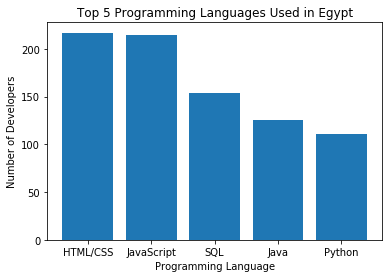

In [225]:
keys = topLanguages2019.keys()
values = topLanguages2019.values()
plt.title("Top 5 Programming Languages Used in Egypt")
plt.xlabel("Programming Language")
plt.ylabel("Number of Developers")
plt.bar(keys, values)
plt.show()

# Percentage of developers with a different gender

In [227]:
data2019["Gender"].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [228]:
def genderPercentage(data,country):
    if country!="all":
        data=df[df["Country"]==country]
    else:
        data=df
   
    maleDevPercentage=(data["Gender"]=="Man").mean()
    femaleDevPercentage=(data["Gender"]=="Woman").mean()
    otherDev=1-maleDevPercentage-femaleDevPercentage
    devolperGender=[maleDevPercentage,femaleDevPercentage,otherDev]
    
    return devolperGender


([<matplotlib.patches.Wedge at 0x24adf5667c8>,
 [Text(-1.023160796250827, 0.4039083869089305, 'Male'),
  Text(0.9507413431490352, -0.5532548223261761, 'Female'),
  Text(1.0874777684584536, -0.16550559842078555, 'Others')],
 [Text(-0.5580877070459055, 0.22031366558668933, '88.0%'),
  Text(0.518586187172201, -0.3017753576324596, '7.2%'),
  Text(0.5931696918864291, -0.09027578095679212, '4.8%')])

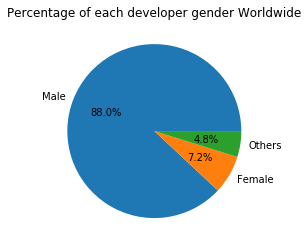

In [229]:
devolperGender=genderPercentage(data2019,"all")
label="Male","Female","Others"
plt.title("Percentage of each developer gender Worldwide")
plt.pie(devolperGender, labels=label,autopct='%1.1f%%')

# Most used web framework in Egypt VS Worldwide

In [230]:
data2019.dropna(subset = ["WebFrameWorkedWith"], inplace=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
topWebFrameworkUsed=topNFromCol(data2019,'WebFrameWorkedWith',"Egypt",5) 

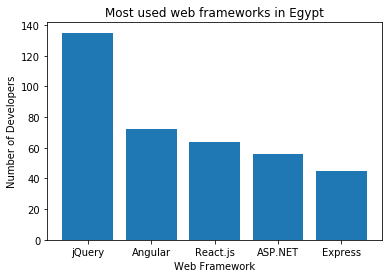

In [232]:
import matplotlib.pyplot as plt
keys = list(topWebFrameworkUsed.keys())
keys[1]="Angular"
values = list(topWebFrameworkUsed.values())
plt.title("Most used web frameworks in Egypt")
plt.xlabel("Web Framework")
plt.ylabel("Number of Developers")
plt.bar(keys, values)
plt.show()

# Work from Office VS work from home

In [233]:
data2019['WorkLoc'].unique()

array([nan, 'Office', 'Other place, such as a coworking space or cafe',
       'Home'], dtype=object)

In [234]:
data2019.dropna(subset = ["WorkLoc"], inplace=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
data2019['WorkLoc'].unique()

array(['Office', 'Other place, such as a coworking space or cafe', 'Home'],
      dtype=object)

In [249]:
def workLocation(data,country):
    if country!="all":
        data=data.query("Country=='{}'".format(country))
    else:
        data=df
    Office=len(data[data['WorkLoc']=="Office"])
    home=len(data[data['WorkLoc']=="Home"])
    OtherPlace=len(data[data['WorkLoc']=="Other place, such as a coworking space or cafe"])
    
    workLocation={"Office":Office,"Home":home,"OtherPlace":OtherPlace}
    return workLocation

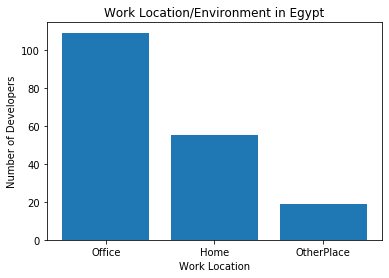

In [251]:
import matplotlib.pyplot as plt
work=workLocation(data,"Egypt")
keys = work.keys()
values = work.values()
plt.title("Work Location/Environment in Egypt")
plt.xlabel("Work Location")
plt.ylabel("Number of Developers")
plt.bar(keys, values)
plt.show()

# Q5: Number of working from home per week

In [252]:
data2019["WorkRemote"].unique()

array(['A few days each month',
       "All or almost all the time (I'm full-time remote)",
       'Less than once per month / Never',
       'More than half, but not all, the time',
       'Less than half the time, but at least one day each week',
       'About half the time', "It's complicated", nan], dtype=object)

In [253]:
data2019.dropna(subset = ["WorkRemote"], inplace=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [254]:
d={}
for state in data["WorkRemote"].unique():
    d[state]=round(len(data2019[data2019['WorkRemote']==state])/len(data),2)
d


{nan: 0.0,
 'Less than once per month / Never': 0.25,
 'A few days each month': 0.15,
 "All or almost all the time (I'm full-time remote)": 0.08,
 'More than half, but not all, the time': 0.02,
 'Less than half the time, but at least one day each week': 0.06,
 'About half the time': 0.02,
 "It's complicated": 0.03}

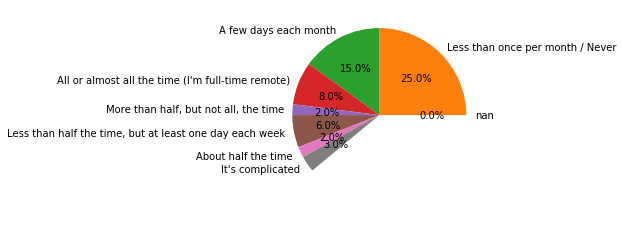

In [255]:
import matplotlib.pyplot as plt

keys = list(d.keys())
values = list(d.values())

plt.pie(values,labels=keys,autopct='%1.1f%%')
plt.show()